# Introduction to Fourier Transforms

-----

In this notebook we introduce Fourier transforms, which are a simple way to analyze time series data that contain periodic components.

-----



## Table of Contents


[Simple Signal](#Simple-Signal)

[Complex Signal](#Complex-Signal)

[Compound Signal](#Compound-Signal)

[Complex Signal with Noise](#Complex-Signal-with-Noise)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

-----

[[Back to TOC]](#Table-of-Contents)


## Simple Signal

To start, we first need to generate a time series, which can subsequently be used to generate a signal for analysis. In the first Code cell, we generate a time series that contains 256 points between zero and ten seconds. Next, we generate a simple _Cosine_ wave using these time data, and plot the resulting signal, which demonstrates the periodicity of this simple signal.

-----

In [2]:
time = np.linspace(0, 10, 256)
delta_time = time[1] - time[0]
print(f'Time Delta = {delta_time:4.3f} seconds')

Time Delta = 0.039 seconds


In [3]:
# Unit frequency signal
y = np.cos(2 * np.pi * time)

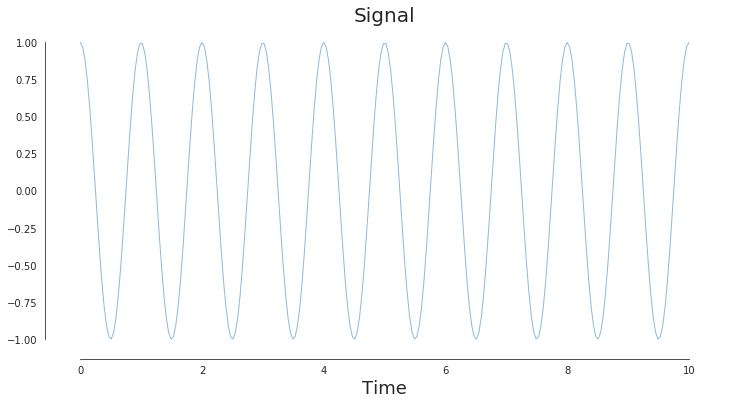

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

-----

With this simple signal we can perform a Fourier transform by using the fast Fourier transform implementation provided in the NumPy library to compute the power as a function of frequency from this simple signal. To simplify the plotting of the FFT results, we also compute the frequencies that span the time spanned by the signal. The results are displayed in the second Code cell, where we see a clear spike in power at the unit frequency, which is the only period in our original data set. Note, because we included the term `2 * np.pi` in our original signal, the frequency is simply one, otherwise it would be `1. / 2 * np.pi`.

-----

In [5]:
# Compute FFT
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

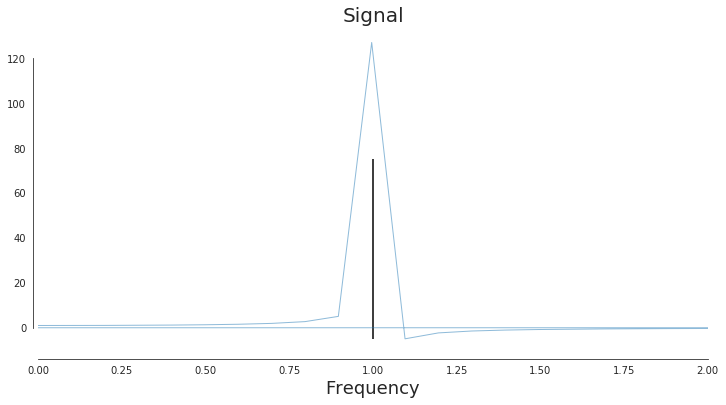

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines(1, -5, 75)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 2))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)


## Complex Signal

Of course, the real world is rarely so simple. As a result, we now generate a slightly more complex signal that combines _cosine_ and _sine_ waves of different periods. This signal, as indicated in the first plot, is more complex, but the subsequent FFT analysis identifies both frequencies, as well as the fact that the power declines with the second period (between every peak, versus the high peak to high peak).

-----

In [7]:
# More complex signal
y = np.cos(2 * np.pi * time) + np.sin(2 * 2 * np.pi * time)

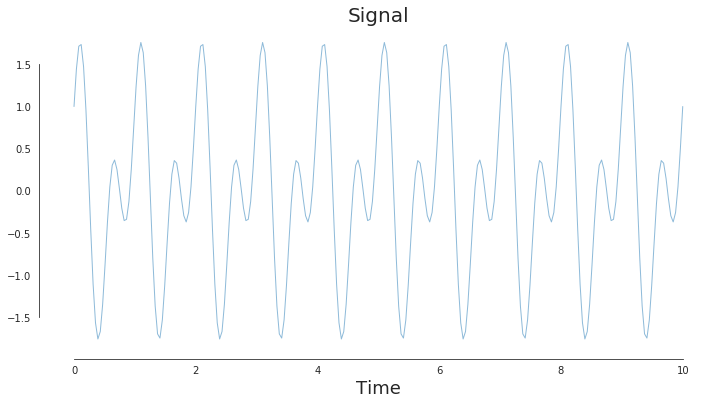

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [9]:
# Compute FFT
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

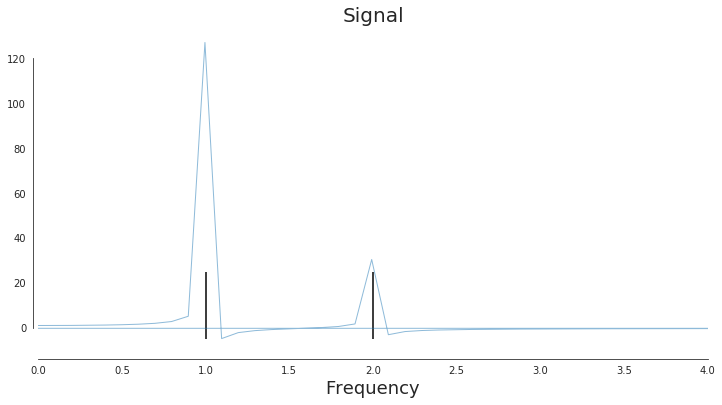

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines([1, 2], -5, 25)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 4))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Compound Signal

We can generate a compound signal by multiplying these terms together as opposed to adding the individual components. In this section, we multiple a simple _cosine_ wave by a _sine_ wave with three times the period. In this case, the FFT analysis is still simple, with more power at the higher frequency; notice how the signal has more peaks within the time span.

-----

In [11]:
# Compound signal
y = np.cos(2 * np.pi * time) * np.sin(2 * 3 * np.pi * time)

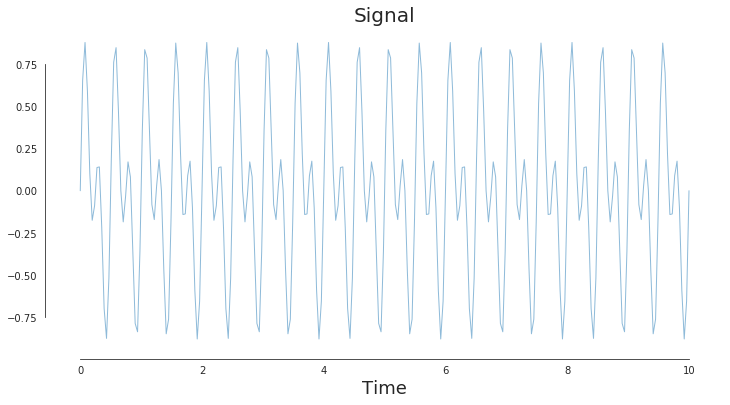

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [13]:
# FFT analysis
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

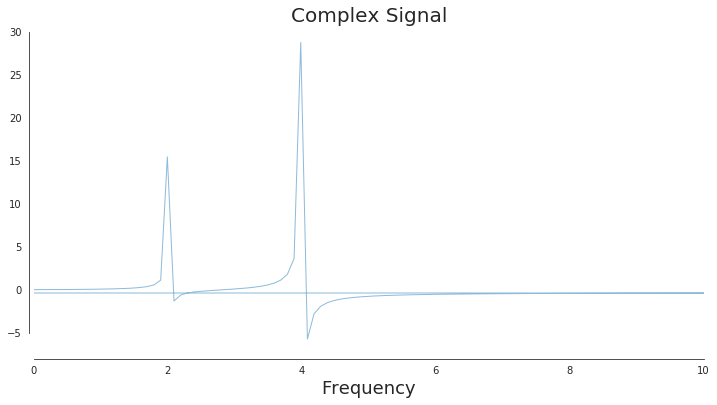

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)

ax.set(title='Complex Signal',
      xlabel='Frequency', xlim=(0, 10))

sns.despine(offset=5, trim=True)

-----

[[Back to TOC]](#Table-of-Contents)

## Complex Signal with Noise

As a final example, we now take our complex signal and add a random noise component. In this case, the FFT analysis still identifies the correct periods, with the right relative power. However, there are additional peaks within the Fourier component plot, especially the one at zero frequency, which can often indicate noise that occurs at small, random frequencies (like we have in this example).

-----

In [15]:
# More complex signal
y = np.cos(2 * np.pi * time) + np.sin(2 * 2 * np.pi * time) + np.random.rand(time.shape[0])

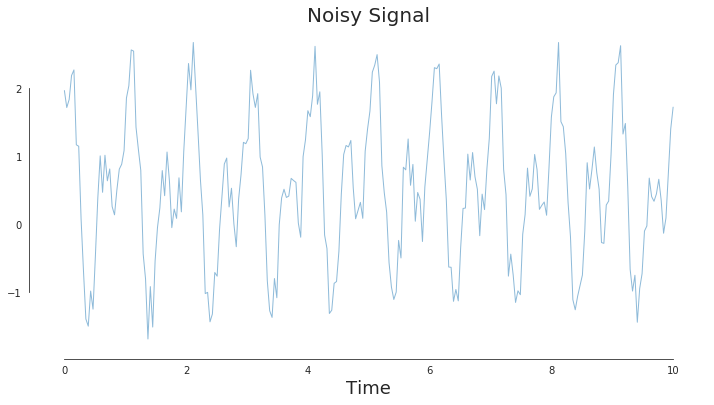

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time, y, lw=1, alpha=0.5)

ax.set(title='Noisy Signal',
      xlabel='Time')

sns.despine(offset=5, trim=True)

In [17]:
# FFT analysis
yf = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), d = delta_time)

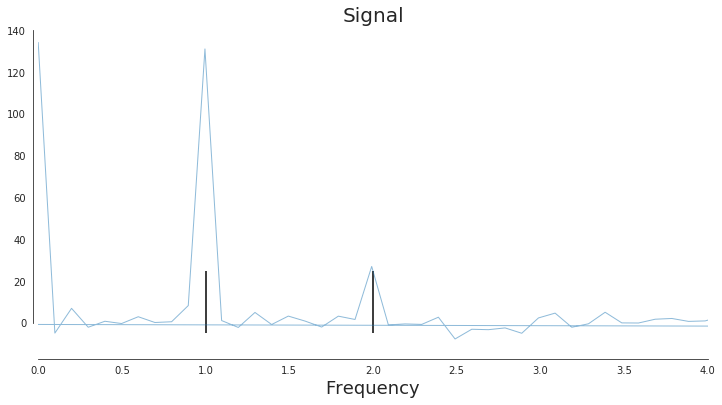

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(freq, yf, lw=1, alpha=0.5)
ax.vlines([1, 2], -5, 25)
ax.set(title='Signal',
      xlabel='Frequency', xlim=(0, 4))

sns.despine(offset=5, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced Fourier analysis and used this approach to compute periodicities in time series data. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the period used in the simple signal to two or three, do you recover the right frequency with the new periods?
2. Try using a more _cosine_ and _sine_ waves in the complex and compound signal examples. How do your results change?
3. Try changing the noise amplitudes, can you still recover the proper frequencies? 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia article on [Fourier analysis][wfa]
2. Tutorial on [Fourier Transform][begft]
3. Python based [Introduction to the Fast Fourier Transform][tfft]
4. Understanding the [Fast Fourier Transform][efft] with Python
5. Tutorial on [Fourier analysis][tfa] 

-----

[wfa]: https://en.wikipedia.org/wiki/Fourier_analysis

[qna]: https://www.quantstart.com/articles/White-Noise-and-Random-Walks-in-Time-Series-Analysis

[bfa]: https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/ch04.html

[begft]: https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

[tfft]: https://jeremykun.com/2012/07/18/the-fast-fourier-transform/

[efft]: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

[sfft]: https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

[tfa]: https://www.gaussianwaves.com/2013/05/a-tutorial-on-fourier-analysis-fourier-series/

[fssw]: http://firsttimeprogrammer.blogspot.com/2015/04/fourier-series-and-square-wave.html

[pfam]: https://www.plot.ly/matplotlib/fft/

[faps]: http://linuxgazette.net/115/andreasen.html (Sunspots FFT)

[fap]: https://www.asee.org/public/conferences/56/papers/12461/download

[pfsp]: https://glowingpython.blogspot.com/2011/08/how-to-plot-frequency-spectrum-with.html

[bspp]: http://samcarcagno.altervista.org/blog/basic-sound-processing-python/

[wrp]: http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode